#### **모두를 위한 딥러닝**
slide
https://drive.google.com/drive/folders/1qVcF8-tx9LexdDT-IY6qOnHc8ekDoL03

git
https://github.com/deeplearningzerotoall/PyTorch?tab=readme-ov-file

youtube
https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv


---

**Epoch**
- train dataset 전체 1번 = 1 epoch

**Batch size**
- data를 얼마씩 묶어서 학습할건지


**Iteration**
- batch를 몇번 학습했는지


1000개의 dataset을 batch size 500으로 2번 iteration하면 1 epoch.

---

**weight Initialization 방법**


- 정규분포
    - 평균0, 분산1인 정규분포에서 무작위로 값을 뽑아 weight를 initialization.

- Xavier
    - 입력 노드수와 출력노드의 수를 고려하여 weight initialization

- He
    - 입력 노드 수($n_{in}$)만을 고려

 **가중치 초기화(Weight Initialization) 방식 비교**

| 구분 | Normal (정규분포) | Xavier (자비에) | He (헤/카이밍) |
| :--- | :--- | :--- | :--- |
| **고려 요소** | 없음 (단순 무작위) | 입력 노드 수 + 출력 노드 수 | **입력 노드 수** |
| **분산($\sigma^2$)** | $1$ (고정) | $\frac{2}{n_{in} + n_{out}}$ | $\mathbf{\frac{2}{n_{in}}}$ |
| **찰떡궁합** | 아주 단순한 모델 | **Sigmoid, Tanh** | **ReLU** (현대 딥러닝 표준) |
| **학습 효과** | 층이 깊어지면 학습 불가 | 층이 깊어도 안정적이나 ReLU에 약함 | **심층 ReLU 모델에서 가장 안정적** |

```py
# Initialization (평균0, 분산1 정규분포 무작위 채우기)
# torch.nn.init.normal_(linear1.weight)

# xavier initialization (입력 노드수와 출력노드 수 고려하여)
torch.nn.init.xavier_uniform_(linear1.weight)

# He initialization(입력 노드수만 고려)
torch.nn.init.kaiming_uniform_(linear1.weight)

```

---
**Dropout**
Dropout은 학습 과정에서 일부 노드를 확률적으로 비활성화하여 특정 노드나 경로에 대한 의존을 줄이는 정규화 기법입니다. 이를 통해 오버피팅을 방지하고, 마치 여러 신경망을 합 것과 같은 일반화 효과를 얻을 수 있습니다.

(Loss를 구할때 특정노드를 dropout시키고 구함. )

→ 특정 노드가 잘하면 거기에 집중되고 나머지 노드는 놀게됨.

이를 방지하기 위해 랜덤하게 노드를 죽이면서 각 노드가 데이터에 대해 특징을 모두 잘 뽑을 수 있도록 하는것.

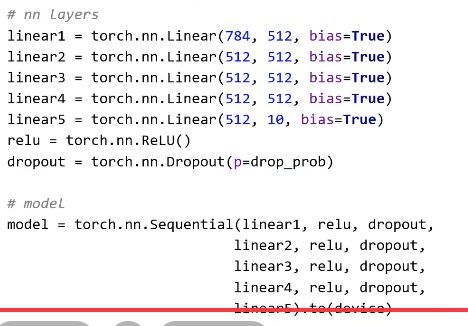

In [83]:
from IPython.display import Image, display
display(Image(filename='3.png', embed=True))

- dropout의 p는 얼마나 비활성화 시킬지 정하는 것(%)
- 학습시만 dropout.  (model.train())
- 추론시는 dropout x  (model.eval())
    - 이렇게 각각 함수를 정의해서 dropout뿐만아니라 batchnorm도 사용안하도록 분리하여 설계할 필요가 있다.

--- 
**batch normalization**

Notion 참고.
https://www.notion.so/robots-oh/Normalization-BN-LN-31363918d42a807491eed38cf8e1b6c2

일반적으로 relu(activation f) 이전에 사용함
linear -> batchNorm -> relu

```python
bn1 = torch.nn.BatchNorm1d(32)
```

---

- 과소적합(Underfitting)인 경우
    - 증상: 에포크(Epoch)가 꽤 지났음에도 학습 정확도가 낮고 손실값이 줄어들지 않습니다.
    - 원인: 모델이 너무 단순하거나(층/노드 부족), 학습 횟수가 너무 적거나, 데이터가 너무 복잡할 때 발생합니다.
    - 해결: 층을 더 쌓거나(Depth), 노드 수를 늘리고(Width), 학습 횟수를 늘립니다.

- 과대적합(Overfitting)인 경우
    - 증상: 학습 데이터로는 거의 100% 맞히는데, 테스트 데이터만 넣으면 엉뚱한 답을 냅니다.

    - 원인: 모델이 너무 복잡하여 데이터의 '노이즈'까지 다 외워버렸을 때 발생합니다.

    - 해결: Dropout 추가, L2 Regularization(Weight Decay) 강화, 데이터 증강(Augmentation), 혹은 모델 크기를 줄입니다.

---
 **모델 저장 및 불러오기**

```python
# 모델 저장하기
torch.save(net.state_dict(), "./model/model.pth")

# 모델 불러오기
new_net = CNN().to(device)
new_net.load_state_dict(torch.load('./model/model.pth'))
```

In [3]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
print(device)

# parameters
training_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)
# drop_last : 전체데이터를 batch로 나눠서 가져올때 남는 데이터는 버린다.

# MNIST data image of shape 28 * 28 = 784
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()


# he initialization (입력 노드수만 고려하여)
torch.nn.init.kaiming_uniform_(linear1.weight)
torch.nn.init.kaiming_uniform_(linear2.weight)
torch.nn.init.kaiming_uniform_(linear3.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cpu


In [39]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad() # 이전 grad 데이터 지우기
        hypothesis = model(X) 
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'loss =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 loss = 0.243080020
Epoch: 0002 loss = 0.091441035
Epoch: 0003 loss = 0.059585903
Epoch: 0004 loss = 0.042654678
Epoch: 0005 loss = 0.032089867
Epoch: 0006 loss = 0.024829112
Epoch: 0007 loss = 0.020358458
Epoch: 0008 loss = 0.017691961
Epoch: 0009 loss = 0.016165340
Epoch: 0010 loss = 0.015816594
Epoch: 0011 loss = 0.009920120
Epoch: 0012 loss = 0.011763383
Epoch: 0013 loss = 0.012243929
Epoch: 0014 loss = 0.010379932
Epoch: 0015 loss = 0.007236612
Learning finished


In [82]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9815999865531921
Label:  2
Prediction:  2


---
**Activation function**

- sigmoid는 x값이 커지거나 작아지면 기울기가 0에 가까워짐
    - gradient vanishing 발생
    - 미분 최대값도 0.25

- ReLU는 x>0 일 때 미분값이 항상 1이다.
    - gradient 보존
    - 단순한 연산으로 학습속도 up
    - 모델을 가볍게 만들수있음(일부 뉴런 0)

    

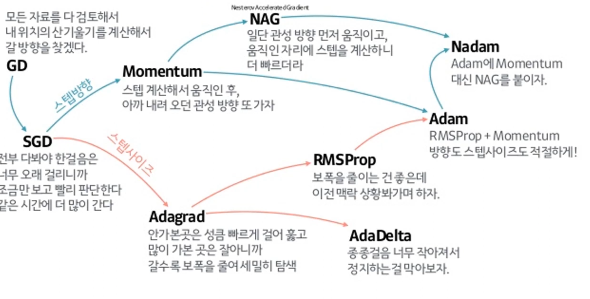

In [1]:
from IPython.display import Image, display
display(Image(filename='2.png', embed=True))